### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

%matplotlib inline

### Loading Data

In [2]:
# 'Normal' tweets

# This data from the sentiment data used by project4
normal_df1 = pd.read_csv('Data/judge-1377884607_tweet_product_company.csv', encoding='unicode_escape')

# This data is from UMASS Global English 
# https://www.kaggle.com/rtatman/the-umass-global-english-on-twitter-dataset
normal_df2 = pd.read_csv('Data/all_annotated.tsv',  sep='\t')

normal_df3 = pd.read_csv('tweets_2016')


In [3]:
normal_df1 = normal_df1['tweet_text']

In [4]:
normal_df1

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 9093, dtype: object

In [5]:
normal_df2

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets
0,434215992731136000,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0
1,285903159434563584,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0
4,286057979831275520,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10497,774941788247298050,TR,2016-09-11,"I'm at @PiazzaAvym in Canik, Samsun w/ @mertar...",1,0,0,0,0,1
10498,774951242422480897,PH,2016-09-11,"El Nido, fica ao norte de Palawan, uma das ilh...",0,0,1,0,0,0
10499,774960083721531392,ID,2016-09-11,Alhamdulillah 😊👨‍👩‍👧‍👧🎂🍦makasih mah pah #lovyu...,0,0,1,0,0,0
10500,775057244798849024,NG,2016-09-11,Eid-Mubarak @ Bauchi Fedral Lowcost https://t....,0,1,0,0,1,0


In [6]:
l = ['tweet_text']

normal_df3 =  normal_df3[l]

In [7]:
normal_df2 =  normal_df2[normal_df2['Definitely English']== 1]

In [8]:
normal_df2 = normal_df2['Tweet']

In [9]:
normal_df1.rename("tweet_text")
normal_df2.rename("tweet_text", inplace= True)

2                                                      Bed
3        I felt my first flash of violence at some fool...
4                  Ladies drink and get in free till 10:30
7        Watching #Miranda On bbc1!!! @mermhart u r HIL...
9                Shopping! (@ Kohl's) http://t.co/I8ZkQHT9
                               ...                        
10493    I'm at Hempstead Hair World in Elmont, NY http...
10494    Bachelorette 💍💞 @ Laurita Winery https://t.co/...
10495    When life gives you Lemon 🍋\nREAD 🤓🤓🤓👌👌👌☝️☝\n-...
10496    This #job might be a great fit for you: Sr. In...
10497    I'm at @PiazzaAvym in Canik, Samsun w/ @mertar...
Name: tweet_text, Length: 5086, dtype: object

In [10]:
alldf = pd.DataFrame(data=normal_df1)
tempdf = pd.DataFrame(data=normal_df2)

In [11]:
alldf= alldf.append(tempdf)

In [12]:
alldf= alldf.append(normal_df3)

In [13]:
alldf['target'] = 0

In [14]:
alldf

,tweet_text,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,0
2,@swonderlin Can not wait for #iPad 2 also. The...,0
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,0
...,...,...
25157,None,0
25158,None,0
25159,Not going to read this. People make stupid dec...,0
25160,None,0


In [15]:
alldf= alldf[alldf.tweet_text != 'None']

In [16]:
alldf

,tweet_text,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,0
2,@swonderlin Can not wait for #iPad 2 also. The...,0
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,0
...,...,...
25153,RT @mxckael: RT pour croquette \nFAV pour trum...,0
25154,Clinton and Trump share awkward charity dinner...,0
25155,RT @brianefallon: CNN: US finds growing eviden...,0
25156,RT @Darren32895836: Lifelong Donald Trump Frie...,0


In [17]:
targetdf =  pd.read_csv('hydrated_tweets')

In [18]:
targetdf = targetdf['tweet_text']

In [19]:
targetdf = pd.DataFrame(data=targetdf)

In [20]:
targetdf['target'] = 1

In [21]:
targetdf

,tweet_text,target
0,I'm not saying I believe there was widespread ...,1
1,Yes of course! https://t.co/YqpjvH0NoS,1
2,@RepPaulMitchell @realDonaldTrump Are you real...,1
3,Unity! https://t.co/I625kseVMn,1
4,Listen to this https://t.co/uhKFLA3GVz,1
...,...,...
67510,OMG https://t.co/QFx2mxyRmj,1
67511,None,1
67512,None,1
67513,#election2020 #election2020results #electionre...,1


In [22]:
alldf = alldf.append(targetdf)

In [23]:
alldf.dropna(inplace=True)

In [24]:
alldf.tweet_text.value_counts()

None                                                                                                                                                                                                                                                                                        26326
@realDonaldTrump My wife and I went to another Tallahassee #StopTheSteal Rally.  Donated money. Going to Georgia.  We want to know why our Rep @TedYoho isn't doing a damn thing! He's retiring! Raise hell already! His replacement @Kat_Cammack isn't doing anything either! GET BUSY!      223
And should be judged at the federal level https://t.co/ESPUR4AUDH                                                                                                                                                                                                                             223
Nope. You really screwed the pooch. https://t.co/oR3TSBzlEu                                                                       

In [25]:
alldf= alldf[alldf.tweet_text != 'None']

In [26]:
alldf

,tweet_text,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,0
2,@swonderlin Can not wait for #iPad 2 also. The...,0
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,0
...,...,...
67506,@ACTBrigitte Count my family and friends. This...,1
67508,@JudiciaryGOP @GOPChairwoman @GOP @GOPLeader @...,1
67510,OMG https://t.co/QFx2mxyRmj,1
67513,#election2020 #election2020results #electionre...,1


In [27]:
X= alldf.tweet_text
y = alldf.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
nltk_sw = stopwords.words('english')

In [29]:
cv_dict = {}
def reportcrossval(model, model_name, X, Y):
    cv_mean = cross_val_score(model, X, Y).mean()
    cv_dict[model_name] = cv_mean
    print(f"The cv mean of {model_name} is {cv_mean}")

In [30]:
pipe_dummy = Pipeline([('dummy', DummyClassifier(strategy='most_frequent'))], verbose=True)

In [31]:
pipe_cv_mnnb = Pipeline(steps=[('cv', CountVectorizer()),
                               ('mnnb', MultinomialNB())],
                        verbose=True)

In [32]:
reportcrossval(pipe_dummy, 'Dummy', X_train, y_train)

[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
[Pipeline] ............. (step 1 of 1) Processing dummy, total=   0.0s
The cv mean of Dummy is 0.6186842318566362


In [33]:
reportcrossval(pipe_cv_mnnb, 'Default CV and MNNB', X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.0s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.0s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   0.9s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   0.9s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
[Pipeline] ................ (step 1 of 2) Processing cv, total=   0.9s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s
The cv mean of Default CV and MNNB is 0.9824483998853129


Notes on this model:

I don't actually think this is all that great. I'd love to be able to train the model on different sorts of misinfo (Covid?) as well as on tweets that are political but not about 2020 voter fraud conspiracies. 

In [34]:
pipe_cv_mnnb.fit(X_train, y_train)

[Pipeline] ................ (step 1 of 2) Processing cv, total=   1.2s
[Pipeline] .............. (step 2 of 2) Processing mnnb, total=   0.0s


Pipeline(steps=[('cv', CountVectorizer()), ('mnnb', MultinomialNB())],
         verbose=True)

In [35]:
y_pred = pipe_cv_mnnb.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)

In [37]:
cmd = ConfusionMatrixDisplay(cm, display_labels =['Not Misinformation', 'Misinformation'] )

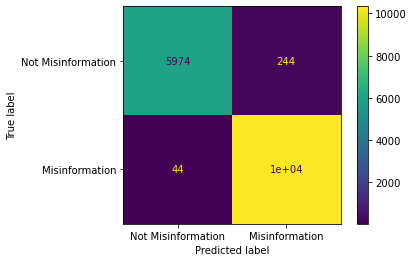

In [38]:
cmd.plot()

In [39]:
type(X_test)

pandas.core.series.Series

In [40]:
y_test_dropindex = y_test.reset_index(drop=True) 

In [41]:
y_test_dropindex

0        1
1        0
2        0
3        0
4        1
        ..
16594    1
16595    0
16596    1
16597    0
16598    1
Name: target, Length: 16599, dtype: int64

In [42]:
x_test_dropindex = X_test.reset_index(drop=True)

In [43]:
x_test_dropindex

0        So true! Dead people voting when will it stop!...
1        What are some good #SXSW iPhone apps that peop...
2        TM litle girl wants an iPad. Guess I got to ge...
3        RT @BernieSanders: Donald Trump is the most da...
4        @JudiciaryGOP @GOPChairwoman @GOP @GOPLeader @...
                               ...                        
16594    @GoJackFlynn in minute mark 8:00 #interference...
16595    @The_Trump_Train @DLoesch @realDonaldTrump  Tr...
16596                 Harvard Poll https://t.co/TorKk8tPU6
16597    Biomimicry as the basis of design and problem ...
16598    Voter fraud..  will never be proven, this is a...
Name: tweet_text, Length: 16599, dtype: object

In [44]:
results_df = pd.DataFrame(y_test_dropindex)


In [45]:
results_df = results_df.join(x_test_dropindex)

In [46]:
results_df

,target,tweet_text
0,1,So true! Dead people voting when will it stop!...
1,0,What are some good #SXSW iPhone apps that peop...
2,0,TM litle girl wants an iPad. Guess I got to ge...
3,0,RT @BernieSanders: Donald Trump is the most da...
4,1,@JudiciaryGOP @GOPChairwoman @GOP @GOPLeader @...
...,...,...
16594,1,@GoJackFlynn in minute mark 8:00 #interference...
16595,0,@The_Trump_Train @DLoesch @realDonaldTrump Tr...
16596,1,Harvard Poll https://t.co/TorKk8tPU6
16597,0,Biomimicry as the basis of design and problem ...


In [47]:
y_pred_proba = pipe_cv_mnnb.predict_proba(X_test)

In [48]:
y_pred_proba = pd.DataFrame(data = y_pred_proba)
y_pred = pd.DataFrame(data = y_pred)

In [49]:
y_pred_proba

,0,1
0,3.104156e-14,1.000000e+00
1,1.000000e+00,1.786314e-11
2,1.000000e+00,4.894826e-26
3,1.000000e+00,2.871844e-09
4,1.072645e-30,1.000000e+00
...,...,...
16594,1.377750e-22,1.000000e+00
16595,9.999317e-01,6.825730e-05
16596,1.247893e-05,9.999875e-01
16597,1.000000e+00,2.222323e-19


In [50]:
results_df = results_df.join(y_pred_proba)

In [51]:
results_df = results_df.join(y_pred, rsuffix = 'round')

In [52]:
results_df

,target,tweet_text,0,1,0round
0,1,So true! Dead people voting when will it stop!...,3.104156e-14,1.000000e+00,1
1,0,What are some good #SXSW iPhone apps that peop...,1.000000e+00,1.786314e-11,0
2,0,TM litle girl wants an iPad. Guess I got to ge...,1.000000e+00,4.894826e-26,0
3,0,RT @BernieSanders: Donald Trump is the most da...,1.000000e+00,2.871844e-09,0
4,1,@JudiciaryGOP @GOPChairwoman @GOP @GOPLeader @...,1.072645e-30,1.000000e+00,1
...,...,...,...,...,...
16594,1,@GoJackFlynn in minute mark 8:00 #interference...,1.377750e-22,1.000000e+00,1
16595,0,@The_Trump_Train @DLoesch @realDonaldTrump Tr...,9.999317e-01,6.825730e-05,0
16596,1,Harvard Poll https://t.co/TorKk8tPU6,1.247893e-05,9.999875e-01,1
16597,0,Biomimicry as the basis of design and problem ...,1.000000e+00,2.222323e-19,0


In [55]:
errors_df = results_df[results_df['target'] != results_df['0round']]  

In [56]:
errors_df

,target,tweet_text,0,1,0round
165,0,#TrumpBookReports #WhyIWrite #HouseholdClassic...,0.462386,0.537614,1
212,0,My state knows better. @PatMcCroryNC #Pat2k16 ...,0.156718,0.843282,1
249,1,#Election fraud is not exceedingly rare. The o...,0.999966,0.000034,0
273,1,"#StopTheSteal Sidney Powell from #DURHAM, NC #...",0.960831,0.039169,0
283,0,@realDonaldTrump come over here with that wrin...,0.451394,0.548606,1
...,...,...,...,...,...
16106,0,@MissLizzyNJ fake fake fake he show records of...,0.222017,0.777983,1
16111,1,https://t.co/ZOARsq2ovI\n\nShared via Right Ne...,0.685561,0.314439,0
16181,0,Way Home 👍,0.277151,0.722849,1
16273,0,#FF Difference-Makers like @MicheleDMorin ...,0.491843,0.508157,1


In [67]:
false_neg_df = errors_df[errors_df['target'] == 1]
false_neg_df

,target,tweet_text,0,1,0round
249,1,#Election fraud is not exceedingly rare. The o...,0.999966,3.392200e-05,0
273,1,"#StopTheSteal Sidney Powell from #DURHAM, NC #...",0.960831,3.916938e-02,0
294,1,@SebGorka @AndrewCMcCarthy I have heard (you) ...,0.933096,6.690428e-02,0
376,1,I think the same. https://t.co/s4zkNjWF8u,0.872103,1.278966e-01,0
477,1,RT https://t.co/rEkk1IK4ZP,0.997768,2.231667e-03,0
564,1,@7NewsAustralia @realDonaldTrump @RudyGiuliani...,0.911201,8.879906e-02,0
800,1,"Adam shitface , no shame. God Damn him. Piec...",0.999390,6.104866e-04,0
1132,1,It means that domestic covert war against citi...,0.999991,8.818886e-06,0
1218,1,"Lessons from WW2 were learned by this ""journal...",0.999969,3.094516e-05,0
1893,1,Don’t worry they will never make it to the Whi...,0.836810,1.631900e-01,0


Model is very certain about some of these, despite being wrong. Check that last one:

"Election Fraud Update", all caps, not flagged.

In [58]:
false_pos_df = errors_df[errors_df['target'] == 0]

false_pos_df 

,target,tweet_text,0,1,0round
165,0,#TrumpBookReports #WhyIWrite #HouseholdClassic...,0.462386,0.537614,1
212,0,My state knows better. @PatMcCroryNC #Pat2k16 ...,0.156718,0.843282,1
283,0,@realDonaldTrump come over here with that wrin...,0.451394,0.548606,1
332,0,@Howl131 @HartForTrump @ptreid3 @Johnatsrs1949...,0.028400,0.971600,1
424,0,@WrongJill @MRMweb try without Sunglasses 😉,0.276516,0.723484,1
...,...,...,...,...,...
15923,0,@SenSanders NO BERNIE!!. It's about billionair...,0.480678,0.519322,1
16054,0,@seigla #YourWorldYourVote US Presidential E...,0.234716,0.765284,1
16106,0,@MissLizzyNJ fake fake fake he show records of...,0.222017,0.777983,1
16181,0,Way Home 👍,0.277151,0.722849,1


In [65]:
false_pos_df.sort_values(by = '0')

,target,tweet_text,0,1,0round
9880,0,"@PrisonPlanet furthermore, he did a lot of gre...",2.835865e-08,1.000000,1
4083,0,"James Carville On The Election: 'Well, Of Cour...",8.711292e-08,1.000000,1
7706,0,RT @mediumvillain: @DKG3387 @ProgressiveArmy @...,1.639545e-04,0.999836,1
14258,0,@realDonaldTrump u just saying that so u can ...,9.780789e-04,0.999022,1
4695,0,Pat you rule all u tubers\n\nLoll\n😎😎😎😎😎😎😎 htt...,1.313169e-03,0.998687,1
...,...,...,...,...,...
12077,0,#FF Difference-Makers like @TheAmyLambert ...,4.918428e-01,0.508157,1
16273,0,#FF Difference-Makers like @MicheleDMorin ...,4.918428e-01,0.508157,1
1422,0,@gocardsgovols13 The one that said \I'm a girl...,4.926681e-01,0.507332,1
11161,0,Im done with Lawrence he just to damn much 😒 -NV,4.934514e-01,0.506549,1


In [76]:
false_pos_df.iloc[0]['tweet_text']

'#TrumpBookReports #WhyIWrite #HouseholdClassicFilms #PodestaEmails13 #ObamaEmails #VoterFraud #IsReal @BillKristol https://t.co/erYVSIKTn1'

Interesting here. The model wasn't very sure about 165 here, but I think it's not wrong. 9880 is just a 2016 tweet based on the proto-election fraud myths.

In [78]:
results_df.iloc[9880]['tweet_text']

'@PrisonPlanet furthermore, he did a lot of great things-and it was actually the Kennedys who did steal that election in 1960, w/voter fraud,'

Weird catch. Homeboy out here stanning for 1960 Nixon.

In [79]:
results_df.iloc[3100]['tweet_text']

'But, Flower. @ Gyeongju, Korea https://t.co/0XQzelyd4C'

Best guess here is that the model is weighting twitter links heavily. That might be a thing to work on. Maybe in the tokenizer?

In [80]:
results_df.iloc[283]['tweet_text']

'@realDonaldTrump come over here with that wrinkly dried monkey scrotum great granddaddy'